In [1]:
import pandas as pd
path = "Downloads/employee_turnover_scikit_learn/HR_Data_Predict Employee Turnover.csv"
df = pd.read_csv(path)
col_names = df.columns.tolist()
print('column names:')
print(col_names)

print('\nSample data ')
df.head()

column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

Sample data 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,4,157,3,0,1,0,sales,medium
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [3]:
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [4]:
df.shape

(14999, 10)

In [5]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [6]:
import numpy as np
df['Department']=np.where(df['Department']=='support','technical',df['Department'])
df['Department']=np.where(df['Department']=='IT','technical',df['Department'])


In [7]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [8]:
cat_vars =['Department','salary']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(df[var],prefix=var)
    df1 = df.join(cat_list)
    df = df1

In [9]:
df.drop(df.columns[[8,9]], axis=1, inplace=True)
df.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng',
       'Department_sales', 'Department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [10]:
df_vars =df.columns.values.tolist()

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(df[x], df[y].values.ravel())
print("Feature Selection Support:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)

Feature Selection Support: [ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
Feature Ranking: [1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [21]:
cols = ['satisfaction_level','last_evaluation',
        'time_spend_company','Work_accident',
        'promotion_last_5years',
        'Department_accounting','Department_hr',
        'salary_high','salary_low']
x = df[cols]
y = df['left']

In [23]:
from sklearn.model_selection import train_test_split  # Correct import
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score
print('Logistic regression Accuracy:{:.3f}'.format(accuracy_score(y_test,logreg.predict(X_test))))

Logistic regression Accuracy:0.770


In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [29]:
print('Random forest Accuracy {:.3f}'.format(accuracy_score(y_test,rf.predict(X_test))))

Random forest Accuracy 0.978


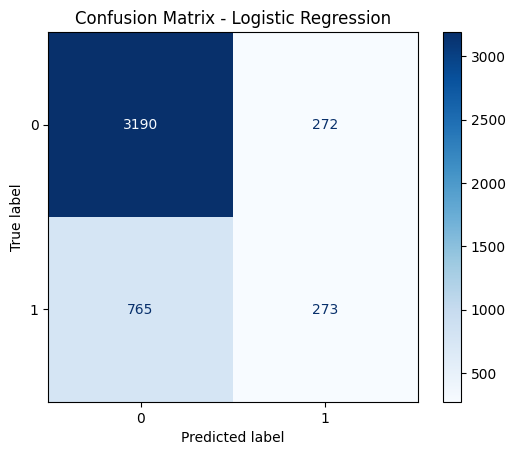

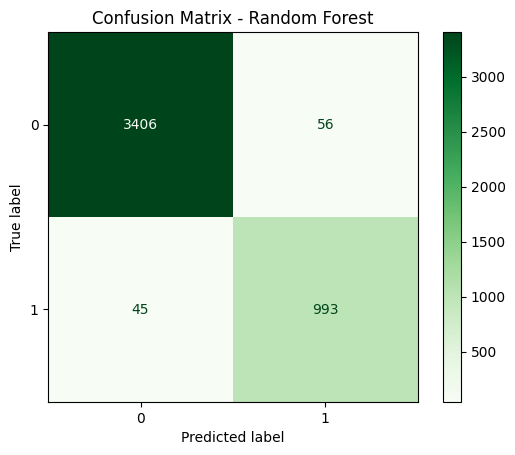

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logreg.predict(X_test))
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic)
disp_logistic.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot(cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [34]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, logreg.predict(X_test)))
print("Random Forest Report:\n", classification_report(y_test, rf.predict(X_test)))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.34      1038

    accuracy                           0.77      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500

Random Forest Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



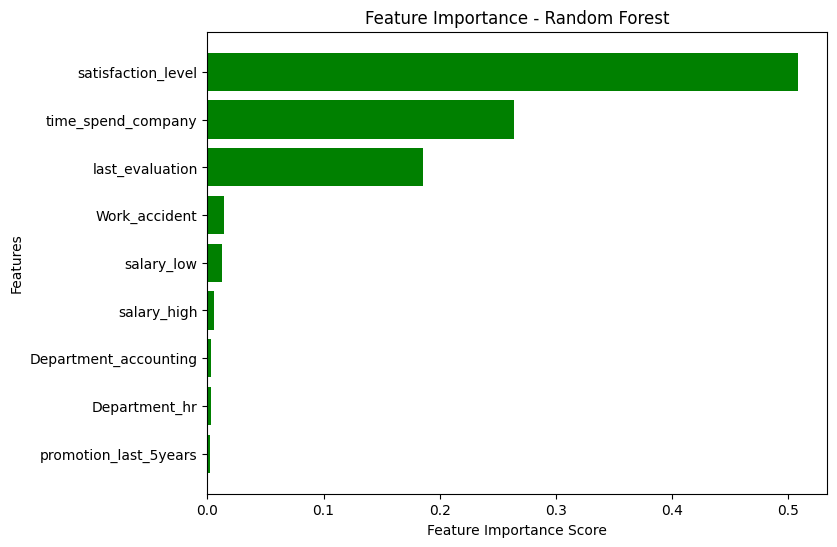

In [36]:
import numpy as np

# Get feature importance
feature_importance = rf.feature_importances_

# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
features_sorted = [X_train.columns[i] for i in sorted_idx]

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(features_sorted, feature_importance[sorted_idx], color='green')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature on top
plt.show()
